# Problem

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Read the data as an appropriate Time Series data and plot the data

In [29]:
df = pd.read_csv('Rose.csv',parse_dates=True)
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [30]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


The dataset contents 187 observations in total.

#### Creating the Time Stamps and adding to the data frame to make it a Time Series Data

In [31]:
dates = pd.date_range(start='1980-01',end='1995-08', freq='M')
dates

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

We have created and saved our date time index as above

In [32]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(dates)
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [33]:
df.set_index('Time_Stamp',inplace=True)
df.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [34]:
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


We do not require the column of "YearMonth" as we have created a Time Stamp for the same and made it as our index column as well. Hence, we have dropped "YearMonth" from our dataset.

In [35]:
df.isnull().sum()

Rose    2
dtype: int64

In [36]:
df[df.Rose.isnull()]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


In [37]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


We observe from a historical record of 187 months since Jan 1980 until July 1995 that average sales over the period of Rose wine was 90 bottles. The least being 28 bottles and highest being 267 bottles. The data however is missing the sales for the 2 months of July and August 1994 which we will fill accurately through interpolate function later. Now, we have our data ready for the Time Series Analysis.

#### Plot the Time Series to understand the behaviour of the data.

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

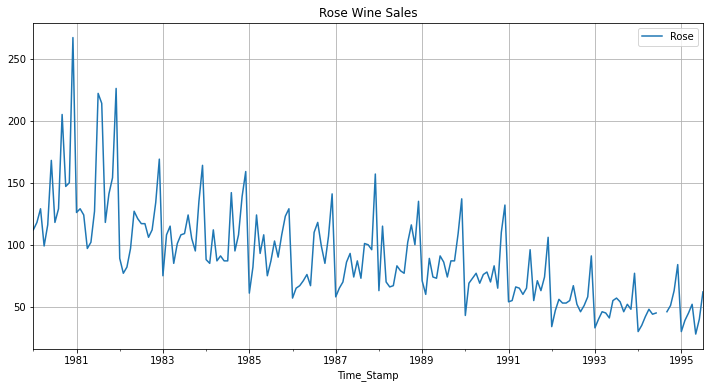

In [39]:
df.plot()
plt.title('Rose Wine Sales')
plt.grid();

For above figure, we observe presence of trend and seasonality throughout the time series. The trend is downward indicating that the sales figures of the Rose Wine have been dropping over the years.

# 1.1 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Yearly Boxplot

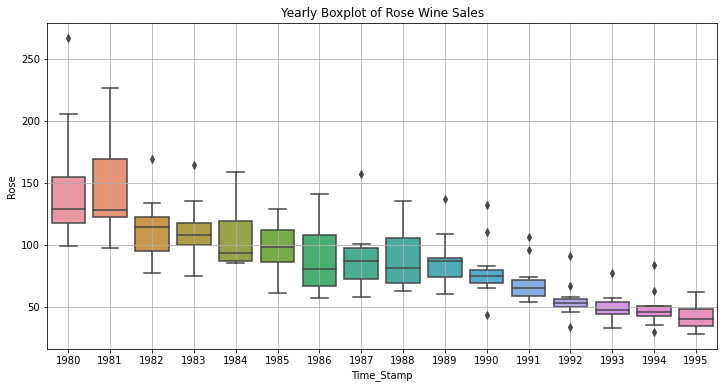

In [40]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.title('Yearly Boxplot of Rose Wine Sales')
plt.grid();

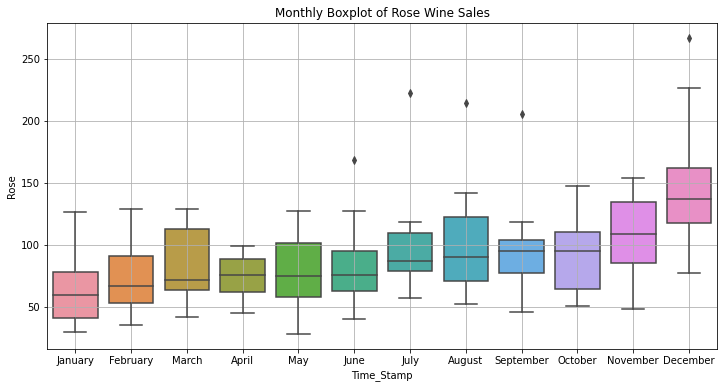

In [41]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.title('Monthly Boxplot of Rose Wine Sales')
plt.grid();

#### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

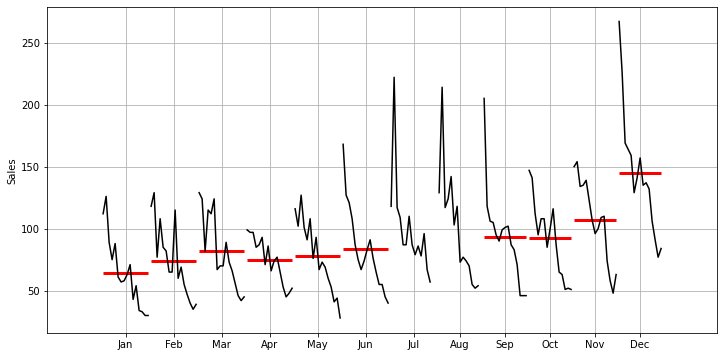

In [42]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

#### Plot a graph of monthly sales across years

In [43]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


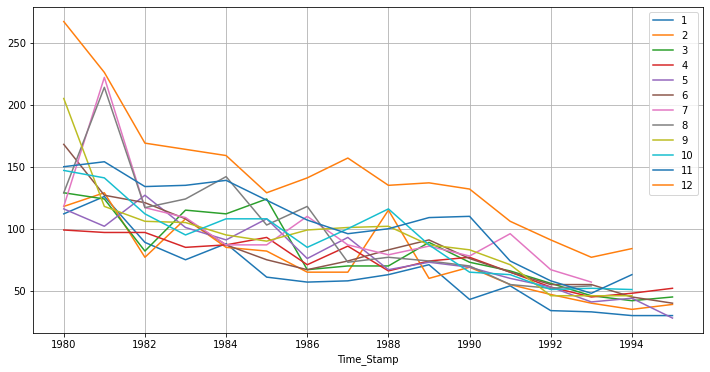

In [44]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution

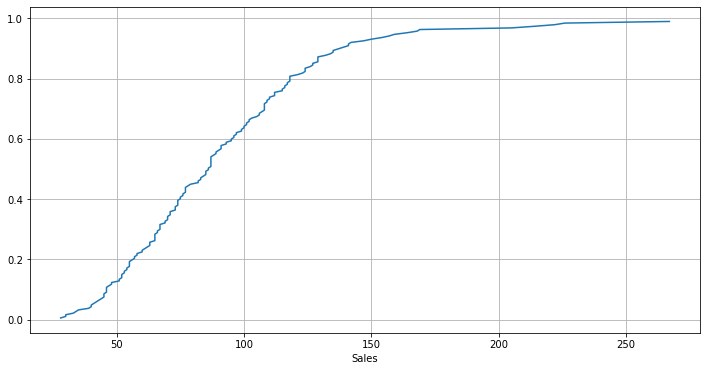

In [45]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure()
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average Sales per month and the month on month percentage change of Sales.

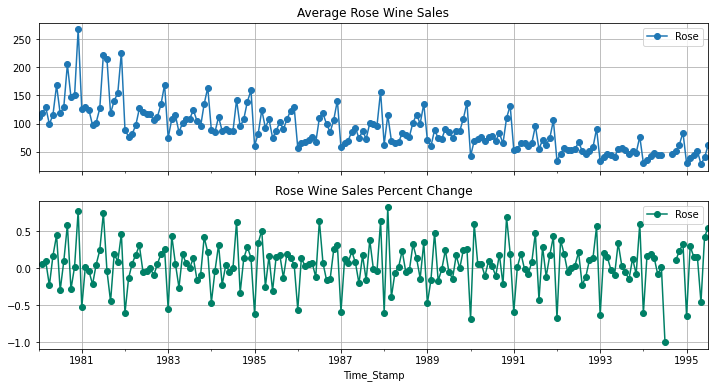

In [46]:
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True)

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percent Change",grid=True)

#### Let us try to resample or aggregate the Time Series from an annual perspective, sum up the observations of each month and also look at the mean of the observations of each month.

In [47]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0
1985-12-31,1183.0
1986-12-31,1063.0
1987-12-31,1060.0
1988-12-31,1073.0


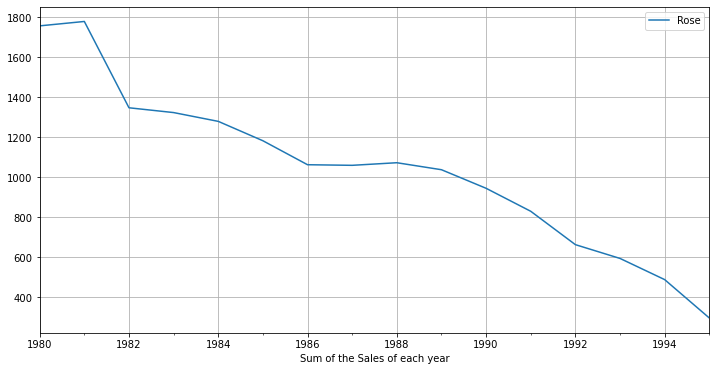

In [48]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Sales of each year');

In [49]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean

,Rose
Time_Stamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667
1985-12-31,98.583333
1986-12-31,88.583333
1987-12-31,88.333333
1988-12-31,89.416667


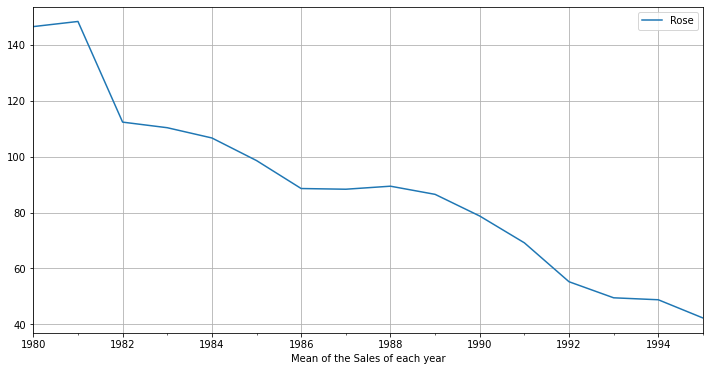

In [50]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Sales of each year');

#### Interpolate Missing Values

In [51]:
df=df.interpolate()

In [52]:
df[df.Rose.isnull()]

,Rose
Time_Stamp,


In [53]:
df['1994']

,Rose
Time_Stamp,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,45.333333
1994-08-31,45.666667
1994-09-30,46.000000


We hve interpolated the missing values for July and August 1994 as the same sales figures for June of 45.33 and 45.66. Now, that we have interpolated the missing values, we can now decompose the time series.

#### Decomposing the Time Series: Additive Method

In [54]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

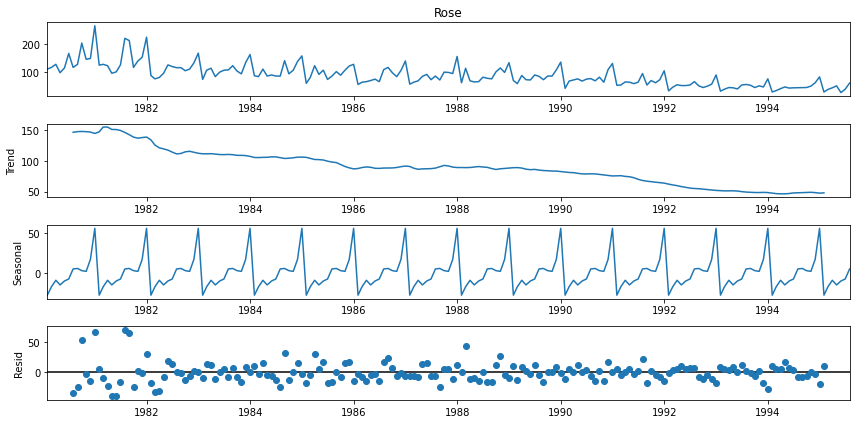

In [55]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [56]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [57]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

# 1.2 Split the data into training and test. The test data should start in 1991

#### Splitting Training and Test dataset

In [58]:
train=df[df.index<'1991']
test=df[df.index>='1991']

In [59]:
print('Training Data Shape ',train.shape)
print('Testing Data Shape ',test.shape)

Training Data Shape  (132, 1)
Testing Data Shape  (55, 1)


In [60]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



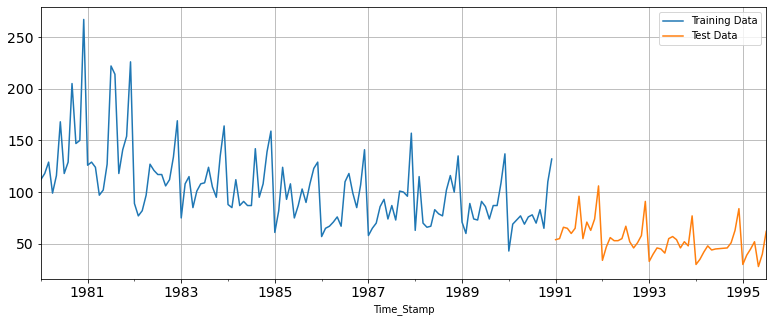

In [61]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 1.3 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

## Linear Regression Model (LR)

In [62]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [63]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [64]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

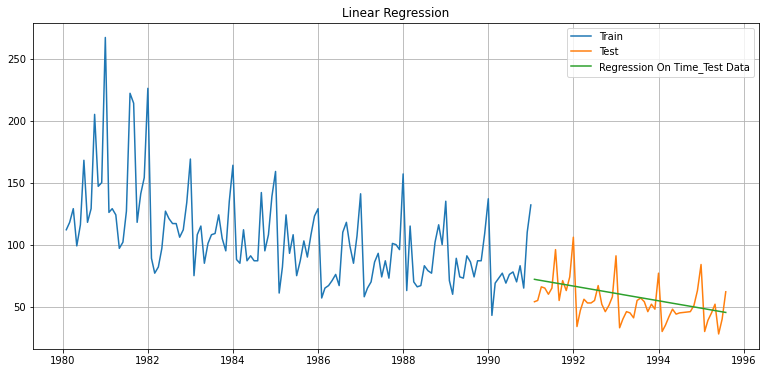

In [66]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title("Linear Regression")
plt.grid();

#### LR Model Evaluation

In [67]:
from sklearn import metrics

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [68]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.268955


## Naive Model: $\hat{y}_{t+1} = y_t$

In [69]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [70]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

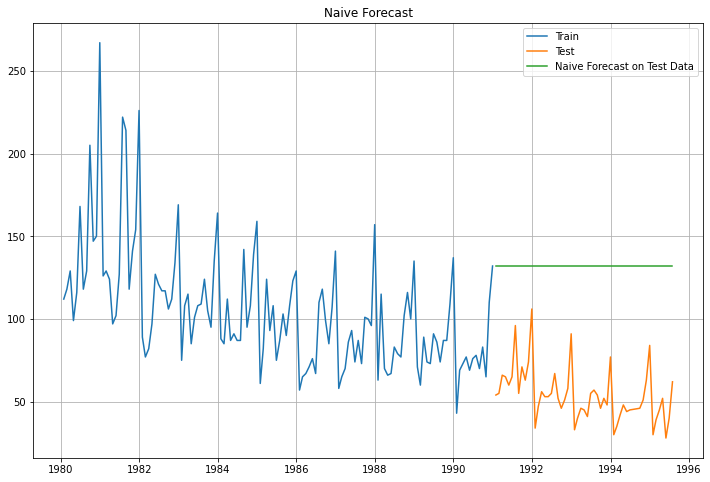

In [71]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Naive Model Evaluation

In [72]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [73]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf_2

,Test RMSE
NaiveModel,79.718773


## Simple Average Model

In [74]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [75]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


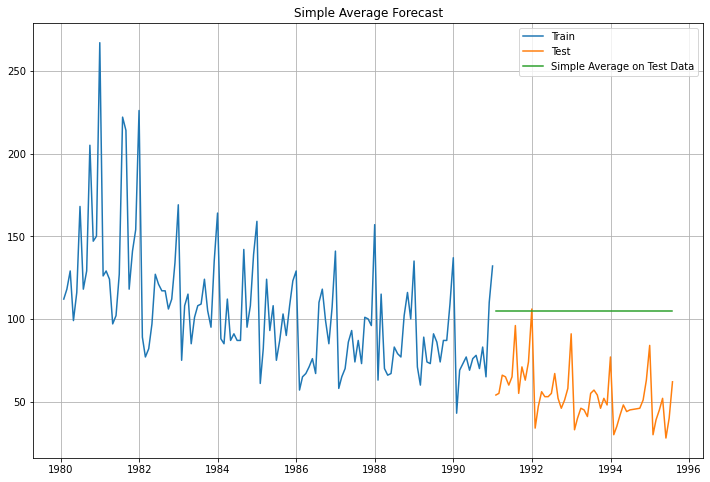

In [76]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Simple Average Model Evaluation

In [77]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [78]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf_3

,Test RMSE
SimpleAverageModel,53.46057


## Moving Average (MA)

In [79]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Trailing moving averages

In [80]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Rose'].rolling(12).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9,Trailing_12
Time_Stamp,,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN,NaN


In [81]:
MovingAverage.tail()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9,Trailing_12
Time_Stamp,,,,,,
1995-03-31,45.0,42.0,49.50,52.000000,49.888889,48.833333
1995-04-30,52.0,48.5,41.50,52.166667,50.629630,49.166667
1995-05-31,28.0,40.0,41.00,46.333333,48.666667,47.833333
1995-06-30,40.0,34.0,41.25,39.000000,48.000000,47.416667
1995-07-31,62.0,51.0,45.50,44.333333,49.222222,48.805556


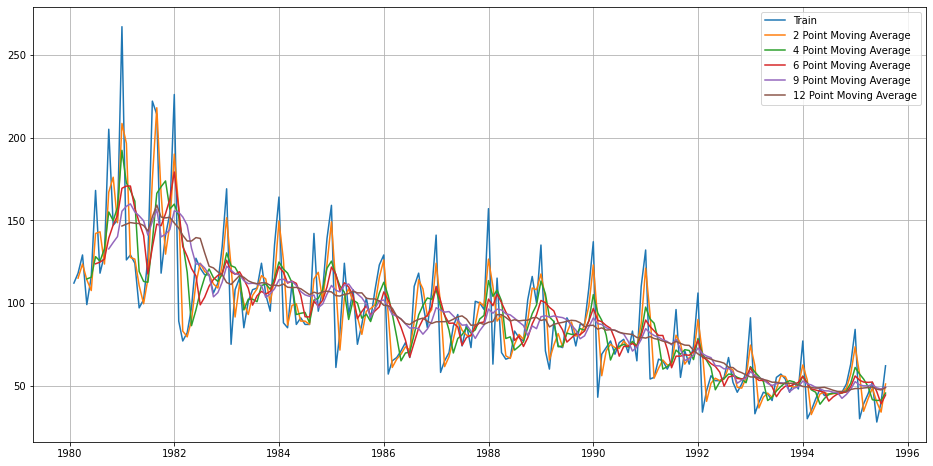

In [82]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [83]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index <'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >='1991']

In [84]:
print('Trailing Moving Average Train Data Shape ',trailing_MovingAverage_train.shape)
print('Testing Moving Average Train Data Shape ',trailing_MovingAverage_test.shape)

Trailing Moving Average Train Data Shape  (132, 6)
Testing Moving Average Train Data Shape  (55, 6)


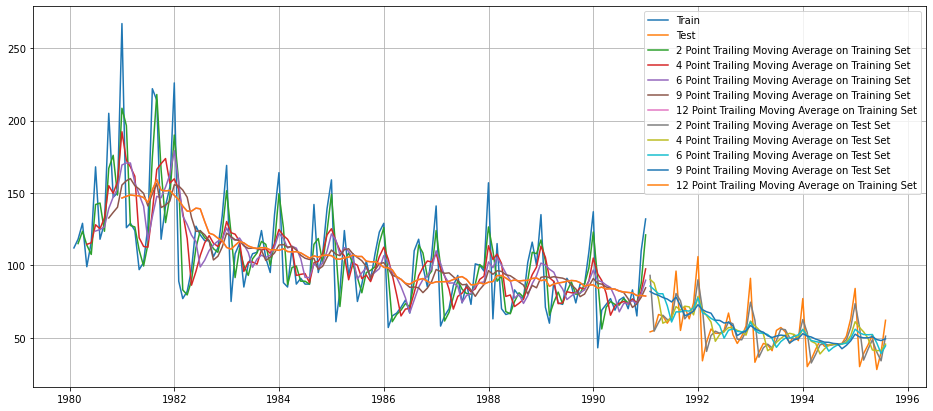

In [85]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,7))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_train['Trailing_12'],label = '12 Point Trailing Moving Average on Training Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

##### Done only on the test data.

In [86]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

## Test Data - RMSE  --> 12 point Trailing MA

rmse_model5_test_12 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model5_test_12))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 
For 12 point Moving Average Model forecast on the Training Data,  RMSE is 15.236 


In [87]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9, rmse_model5_test_12]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf_4

,Test RMSE
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
12pointTrailingMovingAverage,15.236052


#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

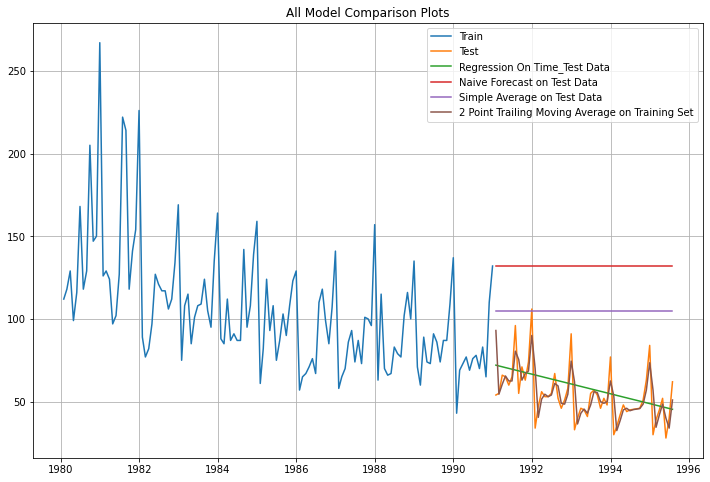

In [88]:
## Plotting on both Training and Test data

plt.figure(figsize=(12,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("All Model Comparison Plots")
plt.grid();

## Simple Exponential Smoothing

In [89]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [90]:
SES_train = train.copy()
SES_test = test.copy()

In [91]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [92]:
model_SES_autofit = model_SES.fit(optimized=True)

In [93]:
model_SES_autofit.params

{'smoothing_level': 0.0987499363908956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38688235486416,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.105
1991-02-28,55.0,87.105
1991-03-31,66.0,87.105
1991-04-30,65.0,87.105
1991-05-31,60.0,87.105


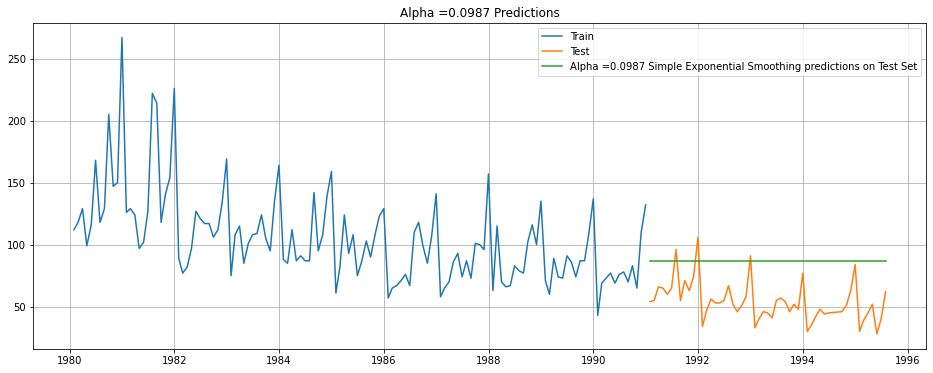

In [95]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,6))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

#### Model Evaluation Simple Exponential Smoothing

In [96]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [97]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf_5

,Test RMSE
"Alpha=0.0987,SimpleExponentialSmoothing",36.796243


## Double Exponential Smoothing (Holts Model)
#### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [98]:
DES_train = train.copy()
DES_test = test.copy()

In [99]:
model_DES = Holt(DES_train['Rose'])

In [100]:
model_DES_autofit = model_DES.fit(optimized=True)

In [101]:
model_DES_autofit.params

{'smoothing_level': 1.4908775269441802e-08,
 'smoothing_trend': 1.8949734557859406e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81549729120044,
 'initial_trend': -0.4943775916109151,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [102]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Rose,predict
Time_Stamp,,
1991-01-31,54.0,72.063278
1991-02-28,55.0,71.568900
1991-03-31,66.0,71.074522
1991-04-30,65.0,70.580145
1991-05-31,60.0,70.085767


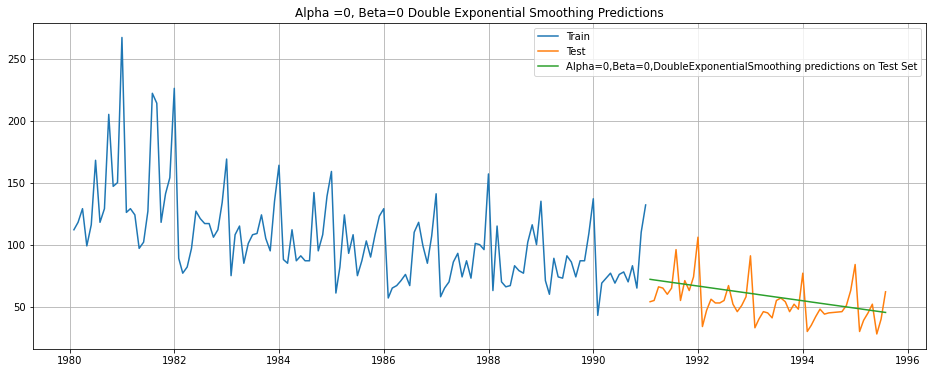

In [103]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,6))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0,Beta=0,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0, Beta=0 Double Exponential Smoothing Predictions');

#### Model Evaluation Double Exponential Smoothing

In [104]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model6_test_1))


For Alpha =0, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.269


In [105]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['For Alpha =0, Beta = 0 DoubleExponentialSmoothing'])

resultsDf_6

,Test RMSE
"For Alpha =0, Beta = 0 DoubleExponentialSmoothing",15.268961


## Triple Exponential Smoothing (Holt - Winter's Model) - Additive

#### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [106]:
TES_train = train.copy()
TES_test = test.copy()

In [107]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')

In [108]:
model_TES_autofit = model_TES.fit()

In [109]:
model_TES_autofit.params

{'smoothing_level': 0.0953400774336367,
 'smoothing_trend': 8.123752920397233e-06,
 'smoothing_seasonal': 0.0007401629066557983,
 'damping_trend': nan,
 'initial_level': 146.55063448621615,
 'initial_trend': -0.5607524537755405,
 'initial_seasons': array([-31.18619303, -18.8254175 , -10.82937858, -21.47043371,
        -12.65742777,  -7.20144279,   2.70737793,   8.80450815,
          4.80959549,   2.90114894,  20.98999207,  63.26317631]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [110]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,42.560188
1991-02-28,55.0,54.360371
1991-03-31,66.0,61.795655
1991-04-30,65.0,50.594055
1991-05-31,60.0,58.846195


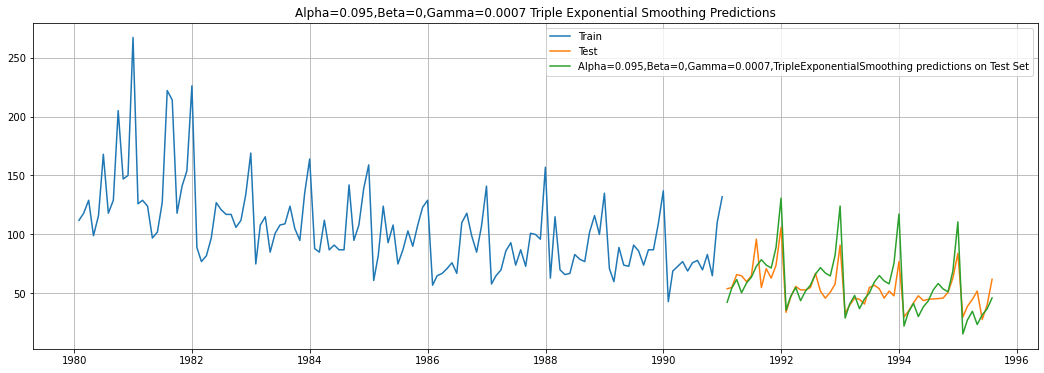

In [111]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,6))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.095,Beta=0,Gamma=0.0007,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.title('Alpha=0.095,Beta=0,Gamma=0.0007 Triple Exponential Smoothing Predictions');

#### Model EvaluationTriple Exponential Smoothing

In [112]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.095,Beta=0,Gamma=0.0007 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))

For Alpha=0.095,Beta=0,Gamma=0.0007 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 14.177


In [113]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]}
                           ,index=['Alpha=0.095,Beta=0,Gamma=0.0007,TripleExponentialSmoothing'])

resultsDf_7

,Test RMSE
"Alpha=0.095,Beta=0,Gamma=0.0007,TripleExponentialSmoothing",14.176738


## Triple Exponential Smoothing (Holt - Winter's Model) - Trend - Additive, Seasonality - Multiplicative

#### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [114]:
TES_train_1 = train.copy()
TES_test_1 = test.copy()

In [115]:
model_TES_1 = ExponentialSmoothing(TES_train_1['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [116]:
model_TES_1_autofit = model_TES_1.fit()

In [117]:
model_TES_1_autofit.params

{'smoothing_level': 0.07400572880570393,
 'smoothing_trend': 0.042744898719206434,
 'smoothing_seasonal': 4.97702110271466e-06,
 'damping_trend': nan,
 'initial_level': 157.50132151432516,
 'initial_trend': -0.9297273143173748,
 'initial_seasons': array([0.71250107, 0.80795165, 0.88336362, 0.77201128, 0.86829462,
        0.94509726, 1.03959711, 1.10717872, 1.04681722, 1.0256658 ,
        1.19562694, 1.64838071]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [118]:
TES_test_1['auto_predict'] = model_TES_1_autofit.forecast(steps=len(test))
TES_test_1.head()

,Rose,auto_predict
Time_Stamp,,
1991-01-31,54.0,56.165554
1991-02-28,55.0,63.480505
1991-03-31,66.0,69.176549
1991-04-30,65.0,60.256449
1991-05-31,60.0,67.546226


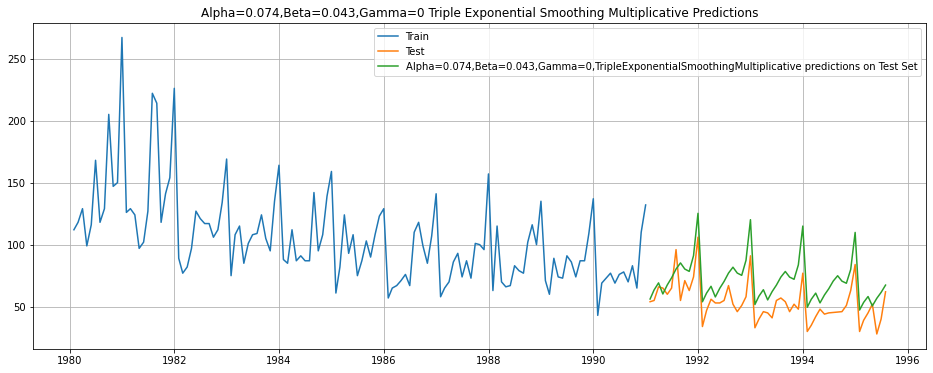

In [119]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(16,6))
plt.plot(TES_train_1['Rose'], label='Train')
plt.plot(TES_test_1['Rose'], label='Test')

plt.plot(TES_test_1['auto_predict'], label='Alpha=0.074,Beta=0.043,Gamma=0,TripleExponentialSmoothingMultiplicative predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Alpha=0.074,Beta=0.043,Gamma=0 Triple Exponential Smoothing Multiplicative Predictions');

#### Model EvaluationTriple Exponential Smoothing Multiplicative

In [120]:
## Test Data

rmse_model8_test_1 = metrics.mean_squared_error(TES_test_1['Rose'],TES_test_1['auto_predict'],squared=False)
print("Alpha=0.074,Beta=0.043,Gamma=0 Triple Exponential Smoothing Multiplicative Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model8_test_1))

Alpha=0.074,Beta=0.043,Gamma=0 Triple Exponential Smoothing Multiplicative Model forecast on the Test Data, RMSE is 19.742


In [121]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_model8_test_1]}
                           ,index=['Alpha=0.074,Beta=0.043,Gamma=0 TripleExponentialSmoothingMultiplicative'])

resultsDf_8

,Test RMSE
"Alpha=0.074,Beta=0.043,Gamma=0 TripleExponentialSmoothingMultiplicative",19.741738


# 1.4 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## H0 = Time Series is not Stationary
## HA = Time Series is Stationary

In [122]:
from statsmodels.tsa.stattools import adfuller

In [123]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



We observe the Time Series is non-stationary for alpha = 0.05 as the p-value is > alpha at 0.34 . Hence, we fail to reject the null hypothesis.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [124]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df.diff().dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput,'\n')

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



We observe the Time Series is now stationary for alpha = 0.05 as the p-value at less than alpha. 

# 1.5 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Arima Model

In [125]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [126]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [127]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.671528853576
ARIMA(1, 1, 0) - AIC:1317.3503105381506
ARIMA(1, 1, 1) - AIC:1280.574229538005
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(2, 1, 0) - AIC:1298.6110341605
ARIMA(2, 1, 1) - AIC:1281.507862186848
ARIMA(2, 1, 2) - AIC:1281.87072222647


In [128]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [129]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 06 Mar 2022   AIC                           1279.672
Time:                        21:46:44   BIC                           1288.297
Sample:                    01-31-1980   HQIC                          1283.176
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

#### Predict on the Test Set using this model and evaluate the model.

In [130]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))


In [131]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

37.30647972204993


In [132]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf_9

,Test RMSE
"ARIMA(0,1,2)",37.30648


## Sarima Model with Seasonality 6

In [133]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [134]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [135]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.499626111386
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.707747182701
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149036
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721824
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515272
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426230857
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029557
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752782
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745042
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253746
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.85641240307
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982512
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455187368924
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082621323
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:

In [136]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655818
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.220389
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778470


In [137]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 06 Mar 2022   AIC                           1041.656
Time:                                   21:48:41   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.914      0.000      -0.891      -0.296
ma.L1         -0.1954    188.566     -0.001

#### Predict on the Test Set using this model and evaluate the model.

In [138]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [139]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.839941,18.848279,25.897993,99.781888
1,67.629885,19.300121,29.802343,105.457427
2,74.746081,19.412682,36.697924,112.794238
3,71.324859,19.475628,33.153329,109.496389
4,76.016791,19.483907,37.829034,114.204548


In [140]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

26.13425389782867


In [141]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)(2,0,2,6)'])

resultsDf_10

,Test RMSE
"SARIMA(1, 1, 2)(2,0,2,6)",26.134254


## Sarima Model with Seasonality 12

In [142]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [143]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [144]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720741
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380888
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385133
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752322
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069755
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945684
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383848
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918273
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094719
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483299725
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535973
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461663
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988349389337
SARIMA(0, 1, 2)x(0, 0, 0

In [145]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686897
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [146]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 06 Mar 2022   AIC                            887.938
Time:                                    21:50:28   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.512     -0.004      0.996    -372.279     370.593
ma.L2         -0.1573     29.773   

#### Predict on the Test Set using this model and evaluate the model.

In [147]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [148]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867261,15.928500,31.647975,94.086547
1,70.541189,16.147658,38.892362,102.190017
2,77.356410,16.147655,45.707587,109.005233
3,76.208813,16.147655,44.559990,107.857637
4,72.747397,16.147655,41.098574,104.396220


In [149]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse)

26.928361033483167


In [150]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])

resultsDf_11

,Test RMSE
"SARIMA(0, 1, 2)(2, 0, 2, 12)",26.928361


# 1.6 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Arima Model based on cut-offs of ACF and PACF

In [151]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

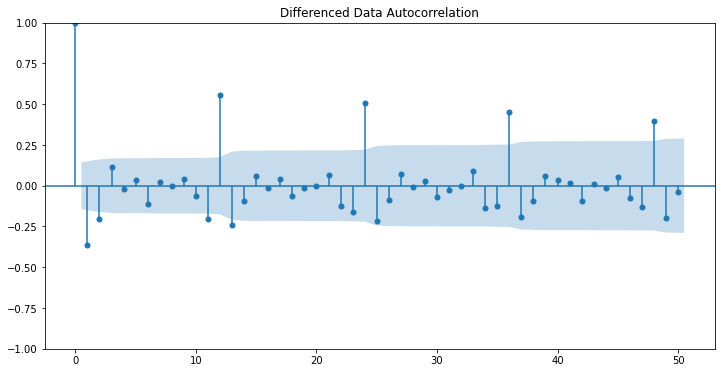

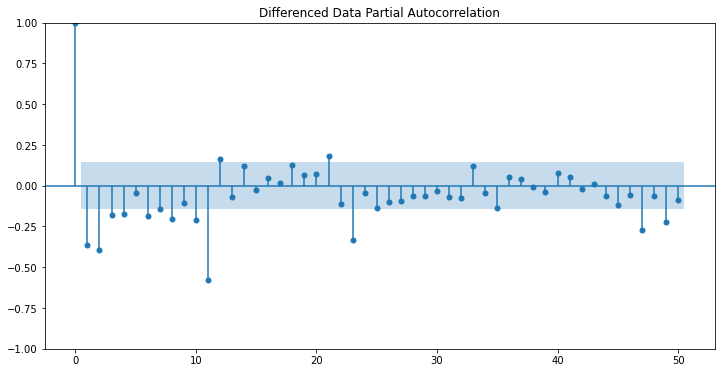

In [152]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.


In [153]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Sun, 06 Mar 2022   AIC                           1285.718
Time:                        21:50:41   BIC                           1305.845
Sample:                    01-31-1980   HQIC                          1293.896
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

In [154]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [155]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

37.03763921092603


In [156]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(4,1,2)'])

resultsDf_12

,Test RMSE
"ARIMA(4,1,2)",37.037639


## Sarima Model based on cut-offs of ACF and PACF

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

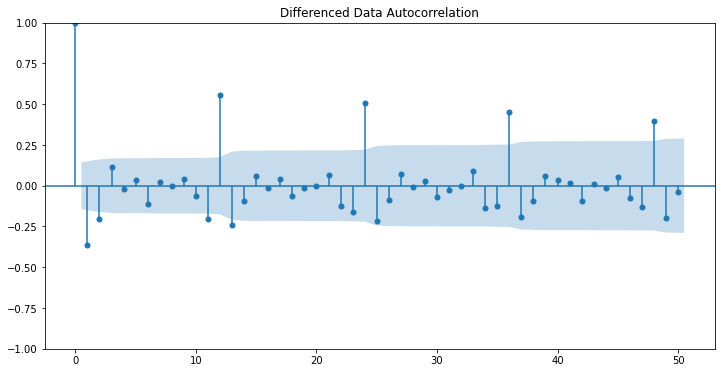

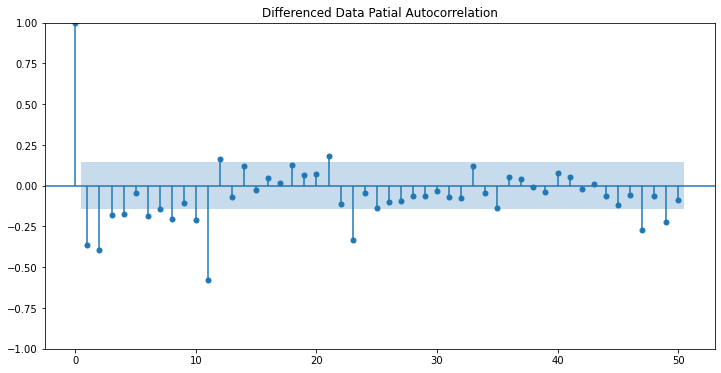

In [157]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

We see that there can be a seasonality of 12. We will run our auto SARIMA models by setting seasonality for 12.

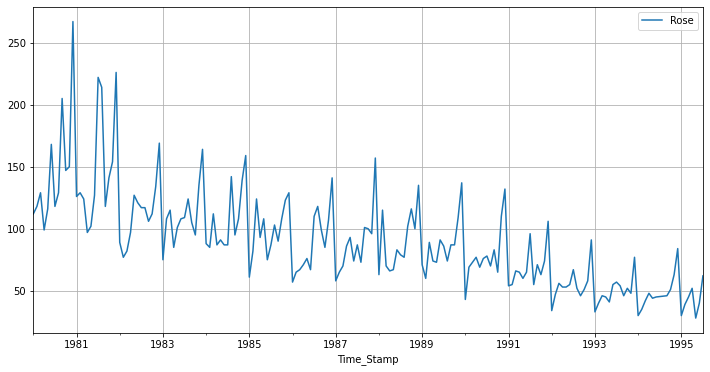

In [158]:
df.plot()
plt.grid();

We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

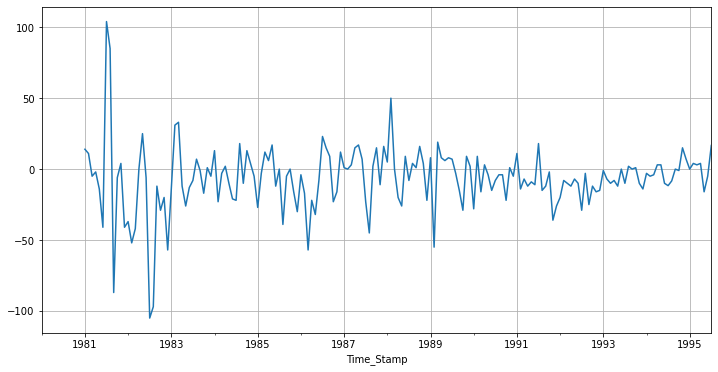

In [159]:
df['Rose'].diff(12).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

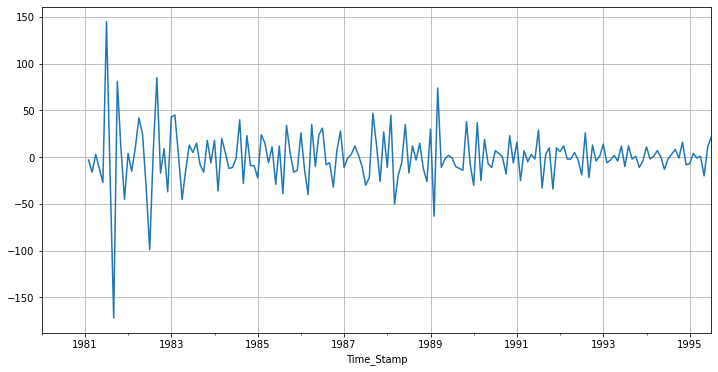

In [160]:
(df['Rose'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Checking the ACF and the PACF plots for the new modified Time Series with Stationarity.

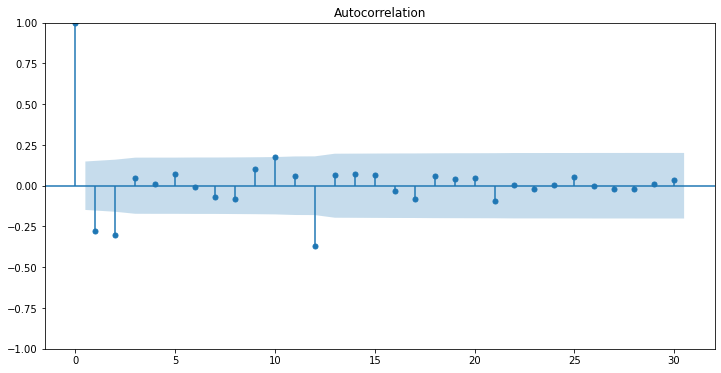

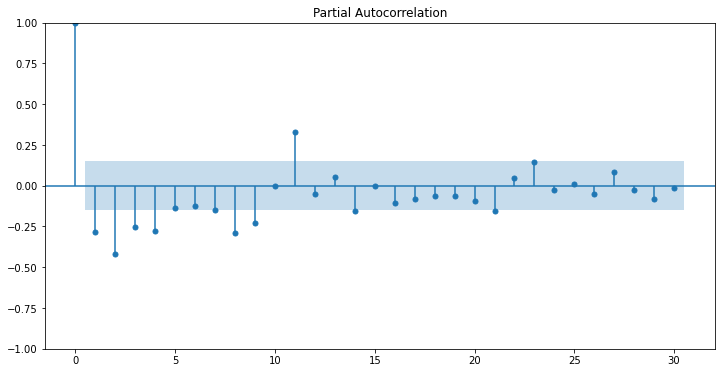

In [161]:
plot_acf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30);  

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 4.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

In [162]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -277.661
Date:                            Sun, 06 Mar 2022   AIC                            581.322
Time:                                    21:51:49   BIC                            609.983
Sample:                                         0   HQIC                           592.663
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9742      0.199     -4.900      0.000      -1.364      -0.585
ar.L2         -0.1123      0.285   

In [163]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [164]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,46.385325,14.770634,17.435414,75.335237
1,62.932846,14.989764,33.553449,92.312244
2,63.527810,14.999436,34.129455,92.926165
3,66.473786,15.179628,36.722261,96.225311
4,63.540811,15.180505,33.787567,93.294055


In [165]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

17.529038567597663


In [166]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,1,2)(4,1,2,12)'])


resultsDf_13

,Test RMSE
"SARIMA(4,1,2)(4,1,2,12)",17.529039


In [167]:
resultsDf = pd.concat([resultsDf,resultsDf_2,resultsDf_3,resultsDf_4,resultsDf_5,resultsDf_6,resultsDf_7,resultsDf_8,resultsDf_9,resultsDf_10,resultsDf_11,resultsDf_12,resultsDf_13])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
12pointTrailingMovingAverage,15.236052
"Alpha=0.0987,SimpleExponentialSmoothing",36.796243
"For Alpha =0, Beta = 0 DoubleExponentialSmoothing",15.268961


In [169]:
resultsDf.sort_values(by='Test RMSE',ascending =True)

,Test RMSE
2pointTrailingMovingAverage,11.529278
"Alpha=0.095,Beta=0,Gamma=0.0007,TripleExponentialSmoothing",14.176738
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
12pointTrailingMovingAverage,15.236052
RegressionOnTime,15.268955
"For Alpha =0, Beta = 0 DoubleExponentialSmoothing",15.268961
"SARIMA(4,1,2)(4,1,2,12)",17.529039
"Alpha=0.074,Beta=0.043,Gamma=0 TripleExponentialSmoothingMultiplicative",19.741738


# 1.8 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Building Full Model on the 2nd best optimum model of Alpha=0.095,Beta=0,Gamma=0.0007,TripleExponentialSmoothing 

In [170]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.095,
                                                                 smoothing_trend=0,
                                                                 smoothing_seasonal=0.0007)

In [171]:
RMSE_fullmodel = metrics.mean_squared_error(df['Rose'],fullmodel.fittedvalues,squared=False)
print('RMSE Full Model:',RMSE_fullmodel)

RMSE Full Model: 17.66530842243013


In [174]:
resultsDf_14 = pd.DataFrame({'RMSE Full Model': [RMSE_fullmodel]}
                           ,index=['Optimum Full Model'])

resultsDf_14

,RMSE Full Model
Optimum Full Model,17.665308


In [175]:
prediction = fullmodel.forecast(steps=12)
prediction

1995-08-31    49.878500
1995-09-30    46.705164
1995-10-31    45.439534
1995-11-30    60.040383
1995-12-31    98.313260
1996-01-31    13.835254
1996-02-29    24.144658
1996-03-31    31.704142
1996-04-30    24.511248
1996-05-31    27.880899
1996-06-30    33.379915
1996-07-31    44.016469
Freq: M, dtype: float64

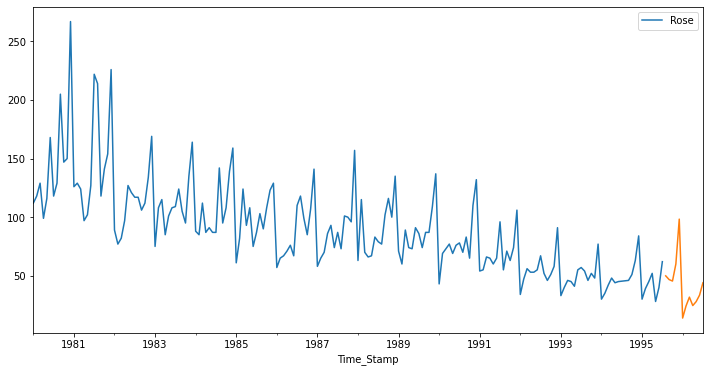

In [176]:
df.plot()
prediction.plot();

In [179]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_df

,lower_CI,prediction,upper_ci
1995-08-31,15.161545,49.878500,84.595455
1995-09-30,11.988209,46.705164,81.422119
1995-10-31,10.722579,45.439534,80.156489
1995-11-30,25.323428,60.040383,94.757338
1995-12-31,63.596305,98.313260,133.030215
1996-01-31,-20.881701,13.835254,48.552209
1996-02-29,-10.572297,24.144658,58.861613
1996-03-31,-3.012813,31.704142,66.421097
1996-04-30,-10.205707,24.511248,59.228203
1996-05-31,-6.836056,27.880899,62.597854


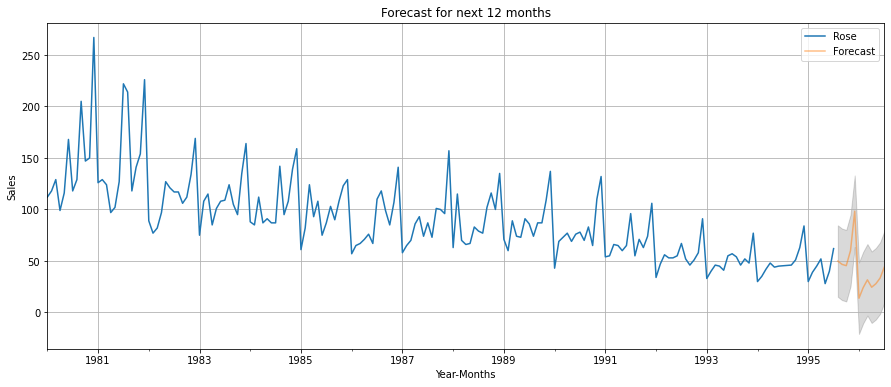

In [180]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,6))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title('Forecast for next 12 months')
plt.legend(loc='best')
plt.grid()
plt.show()

# THE END